In [19]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
# creating a dataframe from the csv file

df = pd.read_csv('Ecommerce Customers.csv')

Understanding the data

In [21]:
# Showing the first 5 rows of the dataframe

df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [22]:
# check how many rows and columns the dataset have

df.shape

(500, 8)

In [23]:
# checking the columns' dataTypes and if its need to be converted or hot-encoded for the ML model

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [24]:
# taking a statstical look at the data for better understanding

df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Data Cleaning

In [25]:
# Checking for duplicates in the dataset

df.loc[df.duplicated(subset=['Email'])].head(5) 

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [26]:
# matching the naming format for other columns
# (.) in the name can casue issues in our code

df = df.rename(columns={'Avg. Session Length':'AVG Session Length'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   AVG Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
# checking if the data have null values

df.isna().sum()

Email                   0
Address                 0
Avatar                  0
AVG Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [28]:
# Remove columns that won't be used in linear regression
# Columns like 'Email', 'Address', 'Avatar' are not useful predictors, so drop them

df_clean = df.drop(['Email', 'Address', 'Avatar'], axis=1)

Define features and target

In [ ]:
X = df[['AVG Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [62]:
print(df_clean.head())

   AVG Session Length  Time on App  Time on Website  Length of Membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


In [61]:
print("\nFeatures:\n", X.head())
print("\nTarget:\n", y.head())


Features:
    AVG Session Length  Time on App  Time on Website  Length of Membership
0           34.497268    12.655651        39.577668              4.082621
1           31.926272    11.109461        37.268959              2.664034
2           33.000915    11.330278        37.110597              4.104543
3           34.305557    13.717514        36.721283              3.120179
4           33.330673    12.795189        37.536653              4.446308

Target:
 0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


Exploratory Data Analysis (EDA)

In [31]:
corr_matrix = df_clean.corr()
corr_matrix

,AVG Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
AVG Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


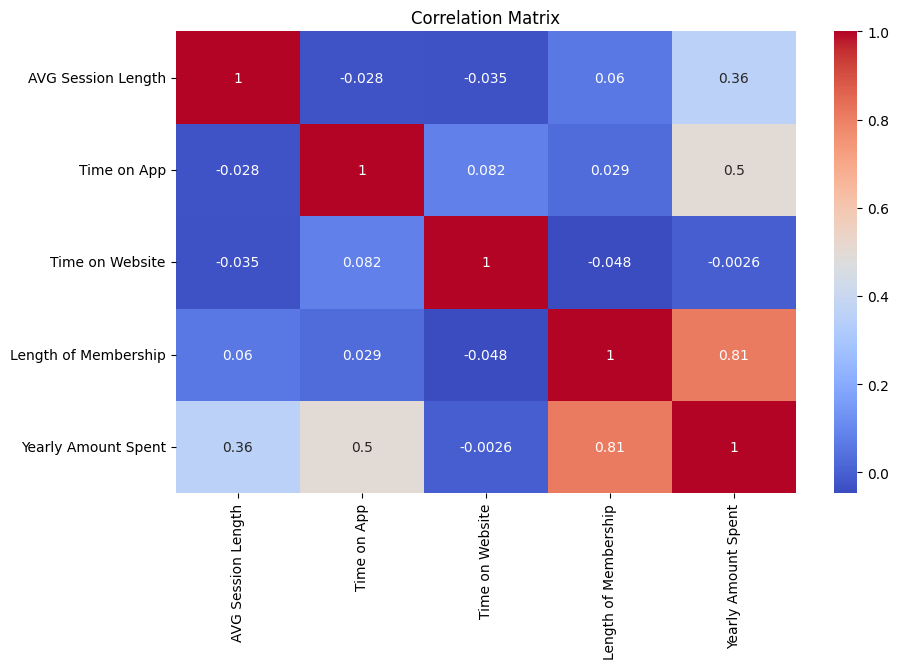

In [32]:
# heatmap to visualize correlations

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights:

* Yearly Amount Spent correlates most strongly with Length of Membership (correlation coefficient ≈ 0.81). This suggests customers who have been members longer tend to spend more.

* Time on App shows a moderate positive correlation with Yearly Amount Spent (≈ 0.50), implying increased app usage is associated with higher spending.

* Avg. Session Length has a positive but weaker correlation with Yearly Amount Spent (≈ 0.36), indicating longer sessions might modestly relate to spending.

* Time on Website has a very weak (near zero) negative correlation with Yearly Amount Spent (≈ -0.003), suggesting time spent on the website does not strongly affect spending.

* The relationships among predictors themselves (like between Avg. Session Length, Time on App, and Length of Membership) are quite weak, indicating minimal multicollinearity concerns.

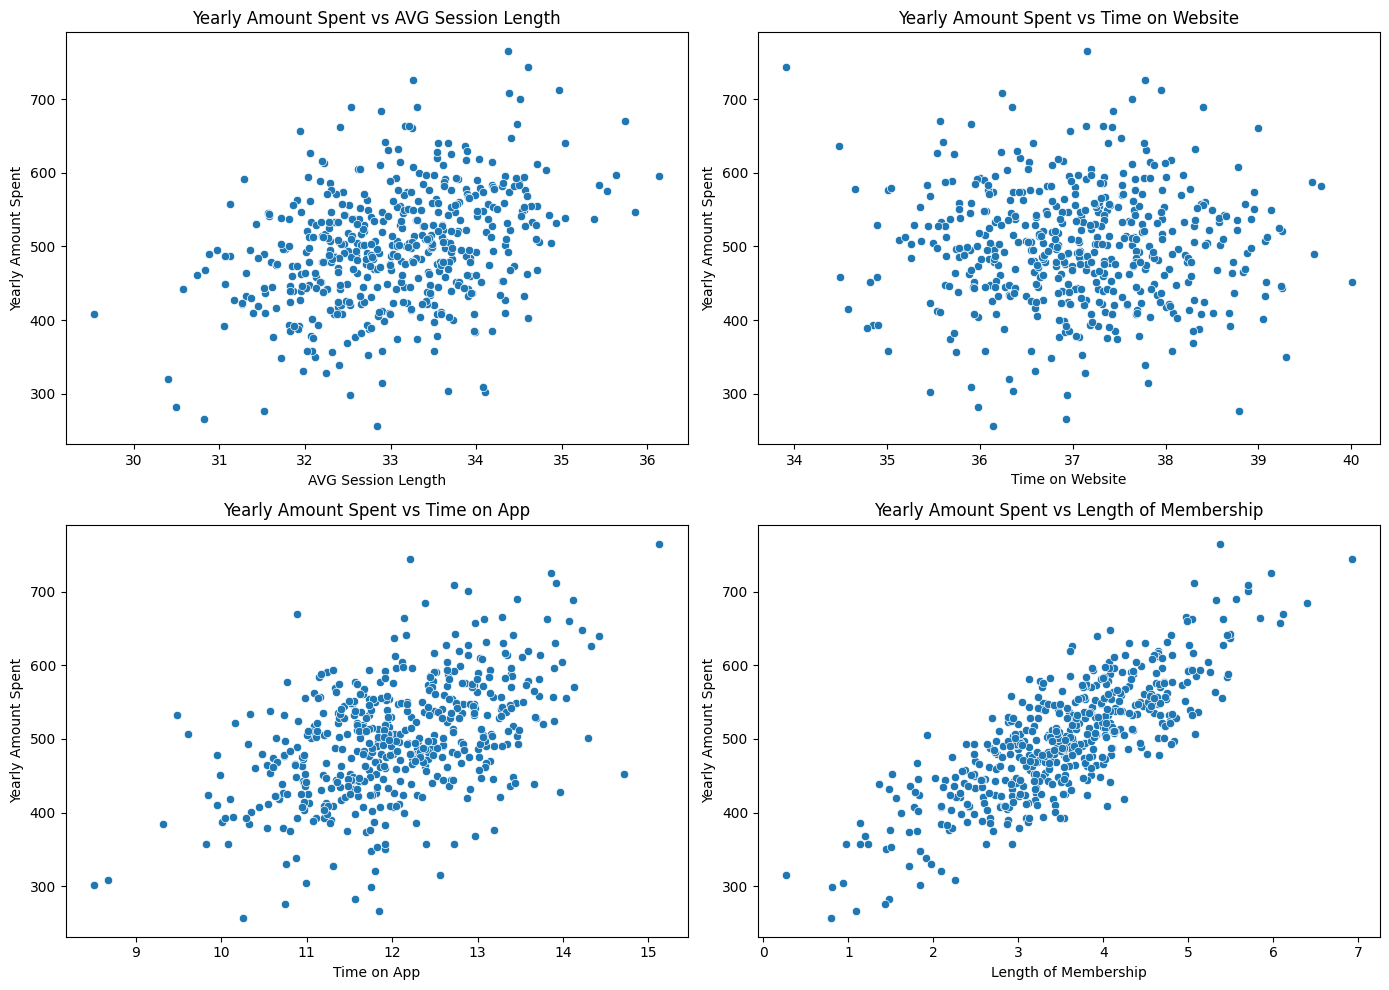

In [33]:
# scatter plots to visualize relationships between predictors and target

plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='AVG Session Length', y='Yearly Amount Spent', data=df_clean)
plt.title('Yearly Amount Spent vs AVG Session Length')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df_clean)
plt.title('Yearly Amount Spent vs Time on Website')
plt.subplot(2, 2, 3)
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=df_clean)
plt.title('Yearly Amount Spent vs Time on App') 
plt.subplot(2, 2, 4)
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df_clean)
plt.title('Yearly Amount Spent vs Length of Membership')
plt.tight_layout()
plt.show()

Train test split

In [37]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training Model

In [39]:
# Train model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Extract coefficients & intercept from the model

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


AVG Session Length: 25.724256205050757
Time on App: 38.5971354786119
Time on Website: 0.459147876631846
Length of Membership: 61.674732432312126


In [ ]:
# showing the intercept and coefficients

print(f"Intercept: {intercept}")
print("Coefficients: ", coefficients)

Intercept: -1050.6536746843296
Coefficients:  [25.72425621 38.59713548  0.45914788 61.67473243]


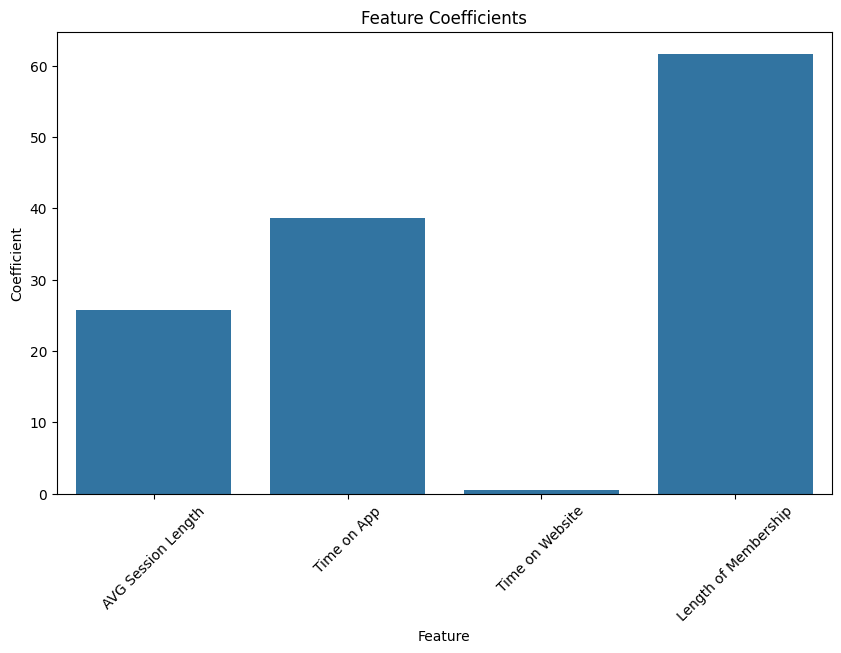

In [ ]:
# Create a DataFrame for visualization

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title('Feature Coefficients')
plt.xticks(rotation=45)
plt.show()

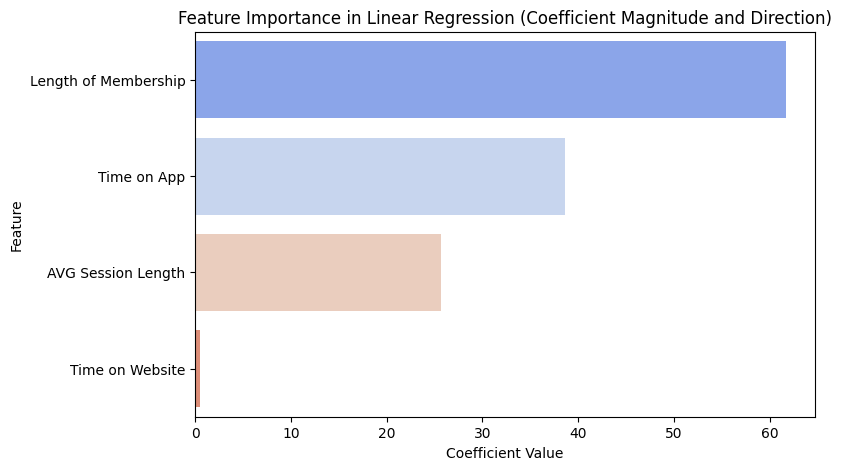

In [ ]:
# Sort by absolute value of coefficients descending

coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance in Linear Regression (Coefficient Magnitude and Direction)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

* "Length of Membership" is the most important feature with the highest positive coefficient.

* "Time on App" and "Avg. Session Length" follow in importance.

* "Time on Website" has the smallest effect based on its coefficient magnitude.

Predict and evaluate

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f"Mean Squared Error: {mse}")
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 8.426091641615495
Mean Squared Error: 103.91554136253926
Root Mean Squared Error (RMSE): 10.193897260740822
R2 Score: 0.9808757641126118


Calculating residuals

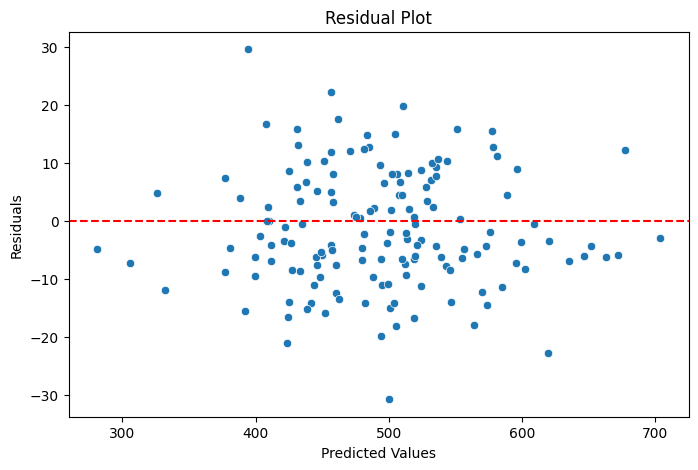

count    150.000000
mean      -1.447120
std       10.124463
min      -30.812190
25%       -7.630461
50%       -3.400220
75%        6.350022
max       29.664160
Name: Yearly Amount Spent, dtype: float64


In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# summary statistics of residuals

print(residuals.describe())

count    150.000000
mean      -1.447120
std       10.124463
min      -30.812190
25%       -7.630461
50%       -3.400220
75%        6.350022
max       29.664160
Name: Yearly Amount Spent, dtype: float64


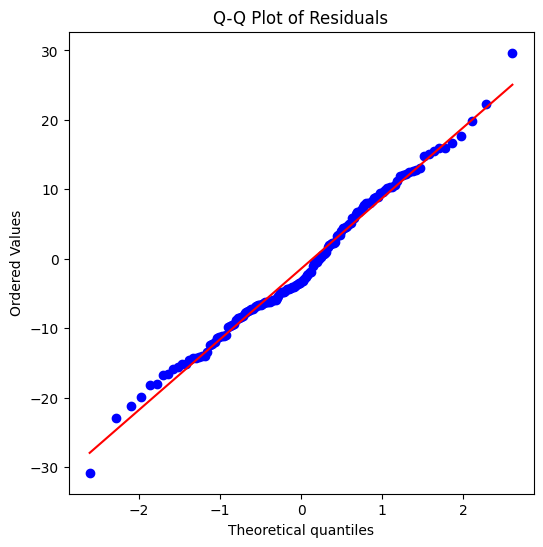

In [ ]:
# Q-Q plot for residuals

from scipy import stats

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [50]:
# Correlation between actual and predicted values

correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f'Correlation Coefficient between Actual and Predicted: {correlation}')

Correlation Coefficient between Actual and Predicted: 0.9905897029924048


What Drives Customer Spending?

* Customers who have been with the store longer tend to spend more money each year. So keeping customers loyal is very important.

* People who spend more time using the mobile app usually also spend more money. The app seems to matter more than the website.

* Customers who have longer average browsing sessions tend to spend more too. More engagement means more buying.

* The amount of time customers spend on the website matters, but not as much as app usage or membership length.

What Should the Business Do?

* Focus on ways to keep customers coming back longer, like loyalty programs or great service.

* Improve and promote the mobile app experience since it correlates with higher spending.

* Encourage customers to stay engaged during their visits (like through engaging content or easy navigation).

* The website is less important for spending compared to the app; prioritize the app for investment.

How Was This Found?

* The data was cleaned and analyzed carefully to find which customer behaviors relate most to yearly spending.

* A statistical model showed membership length and app usage strongly predict spending.

* This helps the business understand where to put effort for the best results in sales and customer value.

In short, keeping customers loyal and encouraging use of the mobile app are the best ways to boost sales. The website is less influential on spending compared to these factors. This helps the company know where to focus to grow revenues simply and smartly.